## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [7]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [8]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [9]:
df.count()[0]

294478

c. The number of unique users in the dataset.

In [10]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [11]:
df.query('converted == 1')['user_id'].nunique()/df['user_id'].nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [12]:
treatment = df.query('group == "treatment" and landing_page == "old_page"')
control = df.query('group == "control" and landing_page == "new_page"')
treatment.count()[0] + control.count()[0]

3893

f. Do any of the rows have missing values?

In [13]:
df.info()
# nope

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [14]:
df2 = df.query('group == "treatment" & landing_page == "new_page" | group == "control" & landing_page == "old_page"')

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [16]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [17]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [18]:
dupes = df2['user_id'].value_counts() > 1
dupes[dupes].index

Int64Index([773192], dtype='int64')

c. What is the row information for the repeat **user_id**? 

In [19]:
df2.query('user_id == 773192').head()

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [20]:
df2 = df2.drop(2893)

In [21]:
df2.query('user_id == 773192').head()

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [22]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [23]:
df2.query('group == "control"').groupby(['group'])['converted'].mean()

group
control    0.120386
Name: converted, dtype: float64

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [24]:
df2.query('group == "treatment"').groupby(['group'])['converted'].mean()

group
treatment    0.118808
Name: converted, dtype: float64

d. What is the probability that an individual received the new page?

In [25]:
df2.query('landing_page == "new_page"').count()[0]/df2.count()[0]

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

There is not sufficient evidence that the new treatement page leads to more conversions. Based on review of how many stury participants received each of the 2 landing page options we see that approximately 50% received the new page (d) which means that 50% also recieved the old page. And in both cases, in the case where the old page (b) was received and where the new page (c) was received, the conversion rate was about 12%. With an equal opportunity to see either page the conversion rate is observed as being the same in both cases.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<p>H0: P_new - P_old <= 0</p>
<p>H1: P_new - P_old > 0</p>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [27]:
# according to the description above both p_new and p_old are equal to the converted rate
# which means there's no need for me to filter the query before getting the probability
# it's the same as 1(a)
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [28]:
# they are both the same so it's the same as (a) above
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [29]:
n_new = df2.query('landing_page == "new_page"').count()[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [30]:
n_old = df2.query('landing_page == "old_page"').count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [31]:
# if i just need to generate a 'coin flip' basically i can use np.random.binomial
# instead of returning an array it will return the number of successes i.e. the total number of conversions
new_page_converted = np.random.binomial(n_new, p_new)
new_page_converted

17261

In [32]:
# so out of 145,310 users at a rate of 12% we ended up with 17,401 converted users which is pretty close to
# 17,437.2 (145,310 * .12) so I think I did this correctly.

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [33]:
old_page_converted = np.random.binomial(n_old, p_old)
old_page_converted

17260

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [34]:
diff = df2[df2['group'] == 'treatment']['converted'].mean() - df2[df2['group'] == 'control']['converted'].mean()
diff

-0.0015782389853555567

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [35]:
new_page_converted = np.random.binomial(n_new, p_new, 10000)/n_new
old_page_converted = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_page_converted - old_page_converted
p_diffs

array([-0.00128925, -0.00051817, -0.00031881, ...,  0.00052111,
        0.00024573, -0.00011229])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

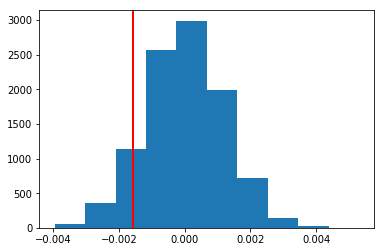

In [36]:
plt.hist(p_diffs)
plt.axvline(x = diff, color = 'red', linewidth = 2);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [37]:
(np.array(p_diffs) > diff).mean()

0.90620000000000001

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<p>The value calculated in (j) is called the <em>P-Value</em>. The P-Value is the probability of observing our statistic if the null hypothesis is true. Based on our hypothesis that the mean is less than or equal to zero, we would review the right side (of the observed differnce) of the values in our histogram above. We want to stick with the rule of thumb value of 0.05 as the threshhold by which we would reject the null hypothesis but our P-Value is actually higher than 0.05. We have exceeded the threshhold and therefore we fail to reject the null hypothesis.</p>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
from statsmodels.stats.proportion import proportions_ztest

convert_old = df2.query('landing_page == "old_page" and converted == 1').count()[0]
convert_new = df2.query('landing_page == "new_page" and converted == 1').count()[0]
n_old = df2.query('landing_page == "old_page"').count()[0]
n_new = df2.query('landing_page == "new_page"').count()[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [39]:
count = np.array([convert_new, convert_old])
nobs = np.array([n_new, n_old])
stat, pval = proportions_ztest(count, nobs, alternative = 'larger')
stat, pval

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<p>Throughout the analysis we've assumed a threshold of 0.05. Based on this we can calculate a standard critical value like so:</p>

In [40]:
from scipy.stats import norm
probability = 0.95
value = norm.ppf(probability)
value

1.6448536269514722

In [41]:
probability = norm.cdf(value)
probability

0.94999999999999996

In [45]:
truth = (stat <= value)
truth

True

<p>Based on what I read <a href="https://machinelearningmastery.com/critical-values-for-statistical-hypothesis-testing/">here</a> and additional notes provided by the reviewer if the z-score is less than the standard critical value it's likely that the observed value was observed in the sampling distribution and that we should therefore fail to reject the null hypothesis.</p> 
<p>In order to have sufficient evidence to reject the null hypothesis, the z-value would need to be some <em>large</em> number pretty far on the right tail of my curve (because the alternative hypothesis is H1: P_new - P_old > 0), and it is not. Also, the p-value calculated here is again more than 0.05. In this case we again fail to reject the null hypothesis. This is in agreeance with the findings in parts (j.) and (k.) above.</p>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<p>Logistic regression since <em>converted</em> has only 1 of 2 possible outcomes.</p>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [46]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

df2['intercept'] = 1

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [47]:
conditions = [
    (df2['group'] == 'treatment'),
    (df2['group'] == 'control')
]
values = [1,0]
df2['ab_page'] = np.select(conditions, values)
df2.head(1)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [48]:
lm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 05 Jan 2021   Pseudo R-squ.:               8.077e-06
Time:                        08:40:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

<p>The p-value here is <em>0.190</em>. It differs from what I got in Part I because it's a completely different kind of hypothesis.</p>
<p>The built in regression model for statsmodels always uses a two sided hypothesis. Instead of the one sided hypothesis I used above, the statsmodel hypothesis is</p>
<blockquote>H0 = 0
<br />H1 != 0</blockquote>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<p>I do believe that it's a good idea to review other factors that might influence conversion. In the first place, across all 3 analysis we fail to reject the null hypothesis which basically means that the null hypothesis is more likely to be true and that neither landing page version resulted in more or less conversions. That being said, 12% of respondents did convert but we do not know why. If we wanted to continue to do whatever it is that got those 12% to convert, at this point we wouldn't know what actions we can take going forward.</p>
<p>The disadvantage to adopting a multiple regression model would be the possibility that we could get false conclusions if the analysis isn't done properly. In our case we may fall into a pitfall caused by incomplete data because currently the data set only has a few data points.</p>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [50]:
df2.head(1)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0


In [51]:
cdf = pd.read_csv('countries.csv')
cdf.head(1)

,user_id,country
0,834778,UK


In [52]:
df3 = df2.join(cdf.set_index('user_id'), on = 'user_id')
df3.head(1)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US


In [53]:
sorted(df3['country'].unique())

['CA', 'UK', 'US']

In [54]:
df3[['ca', 'uk', 'us']] = pd.get_dummies(df3['country'])
df3.head(1)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,ca,uk,us
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1


In [55]:
lm2 = sm.Logit(df3['converted'], df3[['intercept', 'uk', 'us']])
results2 = lm2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 05 Jan 2021   Pseudo R-squ.:               1.521e-05
Time:                        08:40:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
uk             0.0507      0.028      1.786      0.074      -0.005       0.106
us             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

<p>So it looks like the California users experienced a decrease in likelihood to convert. This value appears to be statistically significant since the p-value is less than 0.05. Being in the UK or the US overall though does not have a statistically significant impact on conversion as both of these p-values are above 0.05.</p>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [56]:
df3['us_ab_page'] = df3['us'] * df3['ab_page']
df3['uk_ab_page'] = df3['uk'] * df3['ab_page']
df3['ca_ab_page'] = df3['ca'] * df3['ab_page']
df3.head(1)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,ca,uk,us,us_ab_page,uk_ab_page,ca_ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,0


In [57]:
lm3 = sm.Logit(df3['converted'], df3[['intercept', 'uk_ab_page', 'us_ab_page']])
results3 = lm3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 05 Jan 2021   Pseudo R-squ.:               1.082e-05
Time:                        08:40:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.3164
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9926      0.008   -252.910      0.000      -2.008      -1.977
uk_ab_page     0.0112      0.018      0.626      0.532      -0.024       0.046
us_ab_page    -0.0144      0.012     -1.155      0.248      -0.039       0.010
==============================================================================
"""

<p>Adding in the page value it still appears that regardless of country and regardless of which page was delivered to the user, there is no statistical significance on the user's decision to convert. The p-value is still larger than 0.05.</p>

<h1>Conclusion</h1>
<p> Based on the information above I do not believe that it would be beneficial to the company to run the new page as it has not resulted in any statistical gain in conversions.</p>

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0